# ***Load Dependencies***

In [ ]:
import zipfile # to open zip file that contains dataset
import os

import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Path to the ZIP file
zip_path = '/content/archive.zip'


# Open and extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all contents to the specified directory (e.g., '/content/')
    zip_ref.extractall('/content/')
    print("ZIP file extracted successfully.")

ZIP file extracted successfully.


# ***Load Training & Testing***

In [ ]:
# Path to the training and validation directories
train_dir = '/content/data3a/training'
val_dir = '/content/data3a/validation'

# Initialize lists to hold image data and labels for training and validation
train_data = []
val_data = []

# Load images from the training directory
for label in os.listdir(train_dir):
    label_folder = os.path.join(train_dir, label)
    if os.path.isdir(label_folder):  # Check if it's a directory
        for filename in os.listdir(label_folder):
            if filename.lower().endswith(('.jpeg', '.jpg')):  # Check for image file types
                img_path = os.path.join(label_folder, filename)
                try:
                    img = Image.open(img_path).convert('RGB')  # Open and convert to RGB
                    img_array = np.array(img)  # Convert image to array
                    train_data.append((img_array, label))  # Add to training data list
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")

# Create a DataFrame from the loaded training data
train_df = pd.DataFrame(train_data, columns=['image', 'label'])
print(f"Training data loaded into train_df with {len(train_df)} entries.")

# Load images from the validation directory
for label in os.listdir(val_dir):
    label_folder = os.path.join(val_dir, label)
    if os.path.isdir(label_folder):  # Check if it's a directory
        for filename in os.listdir(label_folder):
            if filename.lower().endswith(('.jpeg', '.jpg')):  # Check for image file types
                img_path = os.path.join(label_folder, filename)
                try:
                    img = Image.open(img_path).convert('RGB')  # Open and convert to RGB
                    img_array = np.array(img)  # Convert image to array
                    val_data.append((img_array, label))  # Add to validation data list
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")

# Create a DataFrame from the loaded validation data
test_df = pd.DataFrame(val_data, columns=['image', 'label'])
print(f"Validation data loaded into test_df with {len(test_df)} entries.")

Training data loaded into train_df with 1383 entries.
Validation data loaded into test_df with 248 entries.


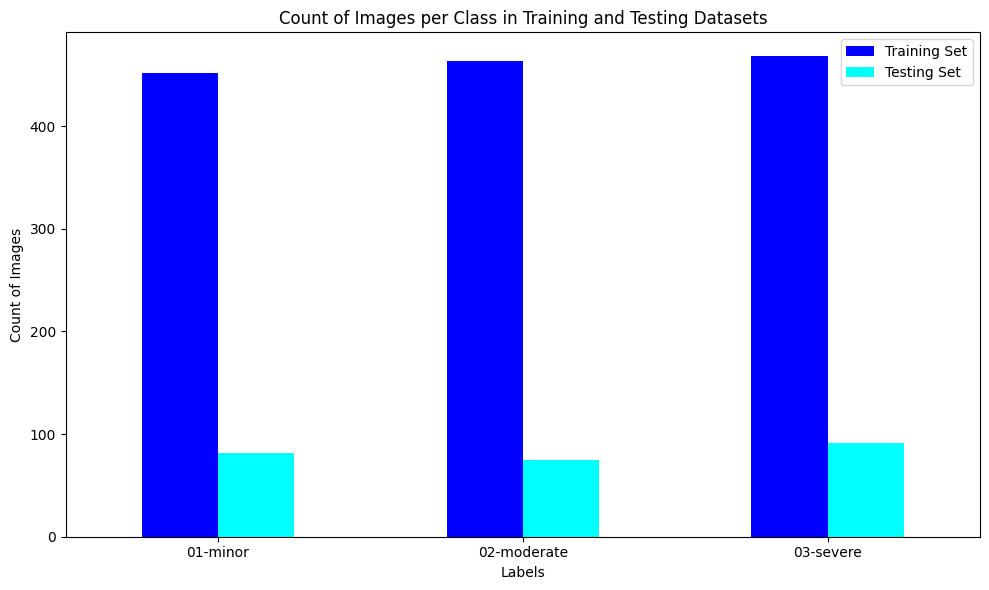

In [ ]:
# Count occurrences of each label in training and testing datasets
train_counts = train_df['label'].value_counts()
test_counts = test_df['label'].value_counts()

combined_counts = pd.DataFrame({
    'train': train_counts,
    'test': test_counts
}).fillna(0)  # Fill NaN with 0 for labels not present in one of the sets

# Plotting
combined_counts.plot(kind='bar', color=['blue', 'cyan'], figsize=(10, 6))
plt.title('Count of Images per Class in Training and Testing Datasets')
plt.xlabel('Labels')
plt.ylabel('Count of Images')
plt.xticks(rotation=0)
plt.legend(['Training Set', 'Testing Set'])
plt.tight_layout()
plt.show()

# ***Image Dimensions***

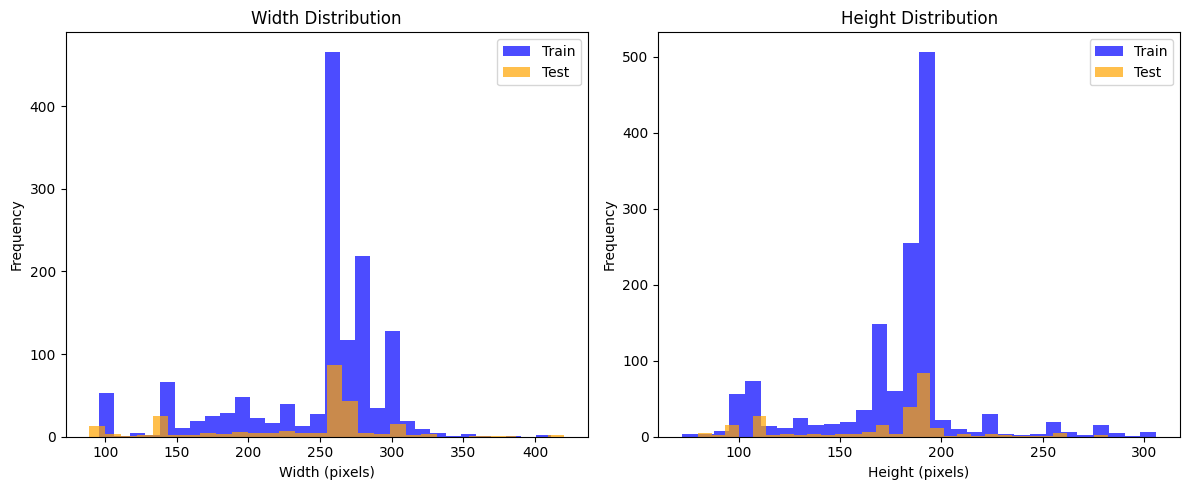

In [ ]:
# Function to get image dimensions
def get_image_dimensions(dataframe, image_col='image'):
    dimensions = []
    for img in dataframe[image_col]:
        img_array = img  # Assuming img is already in array form
        if isinstance(img_array, np.ndarray):  # Check if it’s an array
            height, width, _ = img_array.shape  # Get height and width
            dimensions.append((width, height))
    return dimensions

# Assuming you have your train_df and test_df already defined
# Extract dimensions
train_dimensions = get_image_dimensions(train_df)
test_dimensions = get_image_dimensions(test_df)

# Create DataFrames for dimensions
train_dims_df = pd.DataFrame(train_dimensions, columns=['Width', 'Height'])
test_dims_df = pd.DataFrame(test_dimensions, columns=['Width', 'Height'])

# Plotting
plt.figure(figsize=(12, 5))

# Histogram for Width
plt.subplot(1, 2, 1)
plt.hist(train_dims_df['Width'], bins=30, alpha=0.7, label='Train', color='blue')
plt.hist(test_dims_df['Width'], bins=30, alpha=0.7, label='Test', color='orange')
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.legend()

# Histogram for Height
plt.subplot(1, 2, 2)
plt.hist(train_dims_df['Height'], bins=30, alpha=0.7, label='Train', color='blue')
plt.hist(test_dims_df['Height'], bins=30, alpha=0.7, label='Test', color='orange')
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# **Resizing Functions**

In [ ]:
# Function to resize images with aspect ratio preservation using padding
def resize_with_padding(dataframe, target_size, image_col='image'):
    padded_images = []  # List to hold padded images
    for img in dataframe[image_col]:
        img_pil = Image.fromarray(img)  # Convert NumPy array back to PIL image

        # Resize image while maintaining aspect ratio
        img_pil.thumbnail(target_size, Image.LANCZOS)

        # Create a new blank image with the target size (black background)
        new_image = Image.new("RGB", target_size)

        # Calculate the position to paste the resized image
        paste_x = (target_size[0] - img_pil.width) // 2
        paste_y = (target_size[1] - img_pil.height) // 2

        # Paste the resized image onto the new image
        new_image.paste(img_pil, (paste_x, paste_y))

        padded_images.append(np.array(new_image))  # Convert to array and store

    return padded_images

# Step 2: Resize images in train_df with padding to the maximum dimensions
resizeimage_train = resize_with_padding(train_df, target_size=(224, 224))
resizeimage_test = resize_with_padding(test_df, target_size=(224, 224))

# create a new DataFrame to hold padded images
padded_train_df = pd.DataFrame({'padded_image': resizeimage_train, 'label': train_df['label']})
padded_test_df = pd.DataFrame({'padded_image': resizeimage_test, 'label': test_df['label']})

# Display the shape of the padded images
print(f"Train dataset padded images shape: {len(resizeimage_train)} images of size {resizeimage_train[0].shape if resizeimage_train else 'N/A'}")
print(f"Test dataset padded images shape: {len(resizeimage_test)} images of size {resizeimage_test[0].shape if resizeimage_test else 'N/A'}")

Train dataset padded images shape: 1383 images of size (224, 224, 3)
Test dataset padded images shape: 248 images of size (224, 224, 3)


# ***Display Sample of Images***

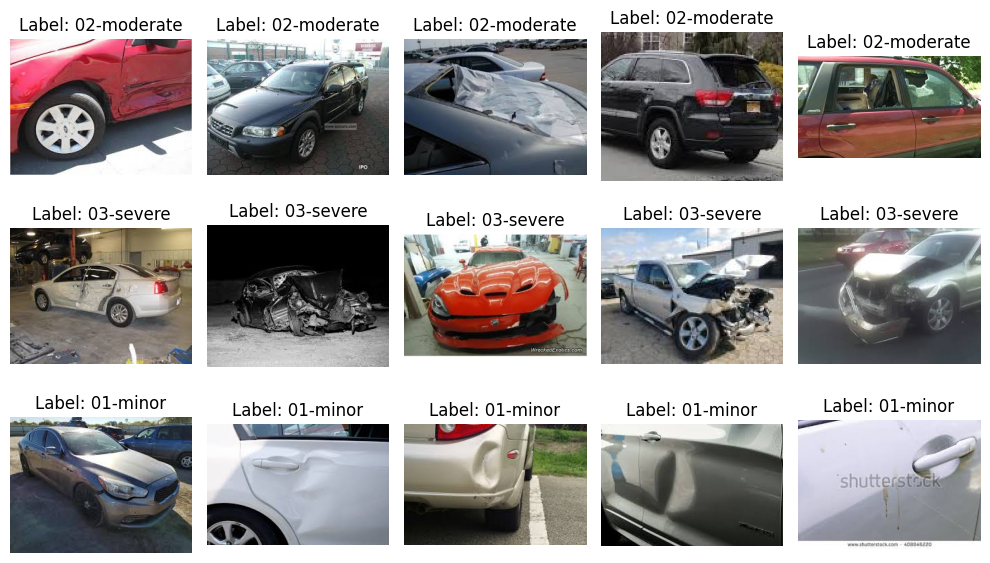

In [ ]:
# Function to display 3x3 images for each label
def show_label_examples(dataframe):
    # Get unique labels from the DataFrame
    unique_labels = dataframe['label'].unique()

    # Set up the figure
    num_labels = len(unique_labels)
    fig, axes = plt.subplots(num_labels, 5, figsize=(10,6))  # 5 columns for each label

    for i, label in enumerate(unique_labels):
        # Filter images for the current label
        label_images = dataframe[dataframe['label'] == label]

        # Select 3 random examples from this label's images
        examples = label_images.sample(n=min(5, len(label_images)))  # Ensure we don't exceed available images

        for j in range(len(examples)):
            example_image, _ = examples.iloc[j]  # Get the image (label is not needed here)

            # Plotting the image
            axes[i, j].imshow(example_image)  # Display the image
            axes[i, j].set_title(f"Label: {label}")  # Show the label
            axes[i, j].axis('off')  # Turn off axis

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Display examples from train_df
show_label_examples(train_df)

# ***Data Aug***



In [ ]:
# prompt: write code that will augment my data

import albumentations as A

def augment_data(image):
  transform = A.Compose([
      A.HorizontalFlip(p=0.5),
      A.RandomBrightnessContrast(p=0.2),
      A.Rotate(limit=10, p=0.5), # Limit rotation to 10 degrees
      A.GaussianBlur(blur_limit=(3, 7), p=0.1) # Add Gaussian blur with a probability of 0.1
  ])

  augmented_image = transform(image=image)['image']
  return augmented_image

# Example usage (assuming you have a dataframe 'train_df'):
augmented_images = []
augmented_labels = []
for image, label in zip(train_df['image'], train_df['label']):
    augmented_image = augment_data(image)
    augmented_images.append(augment_data(image))
    augmented_labels.append(label)
# Create a new dataframe with the augmented images
augmented_df = pd.DataFrame({'image': augmented_images, 'label': augmented_labels})

# Concatenate the augmented data with your original data
train_df = pd.concat([train_df, augmented_df], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


# ***Modeling Prep***



In [ ]:
# encoding labels to numeric for modeling

label_mapping = {
    '01-minor': 0,
    '02-moderate': 1,
    '03-severe': 2
}

encoded_train_df = train_df.copy()  # Create a copy to avoid modifying the original DataFrame
encoded_test_df = test_df.copy()  # Create a copy to avoid modifying the original DataFrame

 # Use fillna to handle labels not present in label_mapping
encoded_train_df['label'] = encoded_train_df['label'].map(label_mapping).fillna(-1).astype(int)
encoded_test_df['label'] = encoded_test_df['label'].map(label_mapping).fillna(-1).astype(int)

# # Remove rows with the filled NaN label (-1)
encoded_train_df = encoded_train_df[encoded_train_df['label'] != -1]
encoded_test_df = encoded_test_df[encoded_test_df['label'] != -1]


In [ ]:
# Normalize pixel values to the range [0, 1]
encoded_train_df['image'] = encoded_train_df['image'].apply(lambda x: x / 255.0)
encoded_test_df['image'] = encoded_test_df['image'].apply(lambda x: x / 255.0)

In [ ]:
# setting train and test sets
train_df = encoded_train_df
test_df = encoded_test_df

# Split the training data into training and validation sets (80/20 split)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 2212
Validation set size: 554
Testing set size: 248


# ***Load CLIP & DenseNet***



In [ ]:
!pip install git+https://github.com/openai/CLIP.git
import clip
from clip import load
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D

import torch
# from tensorflow.keras.applications import DenseNet169, densenet
# from tensorflow.keras.models import Model
from torchvision import models, transforms, datasets
import numpy as np
from torch.utils.data import DataLoader, Subset, TensorDataset
from torch.utils.data.dataset import random_split


import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from transformers import CLIPModel, CLIPProcessor
print("Loaded")

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-b73e0_e0
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-b73e0_e0
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=55f3a349f06a10a920071d4c3ac2def06d53d1030ea3f14a4f6d6773a1e3537a
  Stored in directory: /tmp/pip-ephem-wheel-cache-denj_df_/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
Loaded


In [ ]:
# Load an untrained CLIPModel
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32", state_dict=None)

# Load a pre-trained CLIP processor, the role of the processor is to
# encode the images and texts into the input format expected by the model
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# detect if a GPU is available (make sure it prints cuda)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# load a pre-trained CLIP model (and send it to the GPU if available)
#model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32", device_map='auto')

# load a pre-trained CLIP processor, the role of the processor is to
# encode the images and texts into the input format expected by the model
#processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

cuda


# ***Feature Extraction***


In [ ]:
# DenseNet Model
# base_model = models.densenet161(pretrained=True)

# Efficient NET MOdel
#base_model = models.efficientnet_b0(pretrained=True)


# ResNet Model
base_model = models.resnet50(pretrained=True)


base_model.trainable = False

# DenseNet & Efficient NET Extractor
#feature_extractor = base_model.features

# ResNet Extractor
feature_extractor = nn.Sequential(*list(base_model.children())[:-1])

# move to device for efficient computation
feature_extractor.to(device)
print("Feature extractor model loaded")

Feature extractor model loaded


# ***Image Preprocessing***


In [ ]:
"""## prompt: write code that preprocess the images from the train dataframe

import torch

# Assuming 'padded_train_df' and 'padded_test_df' are defined as in the previous code

def preprocess_images(dataframe, feature_extractor, processor, device):
    image_features = []
    for img in dataframe['padded_image']:
        # Convert to PIL image
        img_pil = Image.fromarray((img * 255).astype(np.uint8))

        # Preprocess the image using the CLIP processor but only keep the pixel values
        inputs = processor(images=img_pil, return_tensors="pt").to(device)
        # Get the pixel values as a tensor
        pixel_values = inputs['pixel_values']

        # Extract features using the feature extractor
        # Pass the pixel_values as the input to the feature extractor, not the entire dictionary
        with torch.no_grad():
            image_features.append(feature_extractor(pixel_values).cpu().numpy())
    return image_features

# Preprocess training images
train_image_features = preprocess_images(padded_train_df, feature_extractor, processor, device)
padded_train_df['image_features'] = train_image_features

# Preprocess testing images
test_image_features = preprocess_images(padded_test_df, feature_extractor, processor, device)
padded_test_df['image_features'] = test_image_features

print("Image preprocessing complete")"""

'## prompt: write code that preprocess the images from the train dataframe\n\nimport torch\n\n# Assuming \'padded_train_df\' and \'padded_test_df\' are defined as in the previous code\n\ndef preprocess_images(dataframe, feature_extractor, processor, device):\n    image_features = []\n    for img in dataframe[\'padded_image\']:\n        # Convert to PIL image\n        img_pil = Image.fromarray((img * 255).astype(np.uint8))\n\n        # Preprocess the image using the CLIP processor but only keep the pixel values\n        inputs = processor(images=img_pil, return_tensors="pt").to(device)\n        # Get the pixel values as a tensor\n        pixel_values = inputs[\'pixel_values\']\n\n        # Extract features using the feature extractor\n        # Pass the pixel_values as the input to the feature extractor, not the entire dictionary\n        with torch.no_grad():\n            image_features.append(feature_extractor(pixel_values).cpu().numpy())\n    return image_features\n\n# Preprocess tra

In [ ]:
# Create a new list to store resized images
###GO OVER
input_images = []
#print(len(input_images))

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_df = encoded_train_df
# Iterate through images and resize them using Pillow
for img in train_df['image']:
    # Check if the image is already a NumPy array
    if isinstance(img, np.ndarray):
        # Convert it to a Pillow Image if it is
        img = Image.fromarray(img.astype(np.uint8)) # Assuming you have imported Image from PIL

    # Convert the image to RGB if it's not already
    if img.mode != 'RGB':
        img = img.convert('RGB')


    # Convert the resized image to a NumPy array
    img_tensor = preprocess(img)
    #print(len(input_images))

    # Append the array to the list
    input_images.append(img_tensor)
    #print(len(input_images))


# Stack the inputs into a single tensor

input_images = torch.stack(input_images)

batch_size = 32  # Adjust batch size based on GPU memory
features = []

for i in range(0, len(input_images), batch_size):
    batch = input_images[i:i + batch_size].to(device) # Move batch to GPU if available
    with torch.no_grad():
        batch_features = feature_extractor(batch)
    features.append(batch_features.cpu()) # Move features back to CPU to save GPU memory

# Concatenate features from all batches
features = torch.cat(features, dim=0)

print("Extracted feature shape:", features.shape)
print("Extracted batch feature shape:", batch_features.shape)

Extracted feature shape: torch.Size([2766, 2048, 1, 1])
Extracted batch feature shape: torch.Size([14, 2048, 1, 1])


In [ ]:
# Compile dataset
labels = train_df['label'].values  # Get the label values as a NumPy array
# establish dataset # Specify dtype for images, Specify dtype (long) for labels classification
dataset = TensorDataset(torch.tensor(input_images, dtype=torch.float32), torch.tensor(labels, dtype=torch.long))

<ipython-input-17-f389372187a4>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(input_images, dtype=torch.float32), torch.tensor(labels, dtype=torch.long))


# ***Classifier Model***


In [ ]:

class CLIPClassifier(nn.Module):
  def __init__(self, output, num_classes, hidden_size):#aka neurons
    super(CLIPClassifier, self).__init__()
    self.clip_model, self.preprocess = clip.load("ViT-B/32", device=device)
# Construct The Layers
    self.fc_lyr1 = nn.Linear(512, hidden_size) # 1st hidden layer
    self.lkrelu = nn.LeakyReLU(negative_slope=0.0001) #introduces non-linearity
    self.fc_lyr2 = nn.Linear(hidden_size, hidden_size) # 2nd hidden layer
    self.relu = nn.ReLU() #introduces non-linearity
    self.fc_lyr3 = nn.Linear(hidden_size, num_classes) # 3rd hidden layer


  def forward(self, input_images):
    # Preprocess the images if necessary (e.g., resize, normalize)
    # Assuming input_images is a batch of images with shape (batch_size, channels, height, width)
    processed_images = []
    for img in input_images:
        # Convert the tensor to a PIL Image
        pil_image = transforms.ToPILImage()(img)
        # Preprocess the image
        processed_image = self.preprocess(pil_image).unsqueeze(0).to(device)
        processed_images.append(processed_image)

    processed_images = torch.cat(processed_images, dim=0)
    # Get image features from CLIP
    with torch.no_grad():
        image_features = self.clip_model.encode_image(processed_images)

    # Cast the image features to float32 before passing to the fully connected layers
    image_features = image_features.type(torch.float32)

# Pass the features through the fully connected layers
    x = image_features.view(-1, 512)
    x = self.fc_lyr1(x)
    x = self.lkrelu(x)
    x = self.fc_lyr2(x)
    x = self.relu(x)
    x = self.fc_lyr3(x)

    return x
'''
 def forward(self, input_images):
    input_images = input_images.permute(0, 3, 1, 2)
    image_features = self.clip_model.get_image_features(pixel_values = input_images)
    x = self.fc_lyr1(image_features)
    x = self.relu(x)
    x = self.fc_lyr2(x)
    #x = self.lkrelu(x)
    #x = self.fc_lyr3(x)
    return x
'''
#############################



'\n def forward(self, input_images):\n    input_images = input_images.permute(0, 3, 1, 2)\n    image_features = self.clip_model.get_image_features(pixel_values = input_images)\n    x = self.fc_lyr1(image_features)\n    x = self.relu(x)\n    x = self.fc_lyr2(x)\n    #x = self.lkrelu(x)\n    #x = self.fc_lyr3(x)\n    return x\n'

# ***Train Function***


In [ ]:
def train(model, criterion, optimizer, tr_loader, va_loader, n_epochs, device):
  model.train()


  train_loss = [] # Initialize as lists to store values for each epoch
  train_acc = []
  val_loss = []
  val_acc = []

  # The function should return four lists, respectively containing the training loss, training accuracy, validation loss, and validation accuracy at each epoch. Make sure to report/print these values at every iteration of the training loop (print one line per epoch).
  for epoch in range(n_epochs):
    model.train()

    # Initialize train_loss_epoch within the epoch loop
    train_loss_epoch = 0.0  # Initialize to 0.0 at the start of each epoch

    correct_tr = 0
    total_tr = 0
    for inputs, labels in tr_loader:
      inputs, labels = inputs.to(device), labels.to(device)

      # Forawrd pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)

      # Bacwkards/backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss_epoch += loss.item() # Accumulate loss

      # COmpute training acc
      _, predicted = torch.max(outputs, 1)
      correct_tr += (predicted == labels).sum().item()
      total_tr += labels.size(0)

    tr_acc_epoch = correct_tr / total_tr # Calculate average accuracy for the epoch
    train_loss_epoch /= len(tr_loader) # Calculate average loss for the epoch

      # Set to validation mode
    model.eval()
    val_loss_epoch = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
      for inputs, labels in va_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        # Forawrd pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Bacwkards/backprop
        optimizer.zero_grad()
        optimizer.step()

        val_loss_epoch += loss.item() # Accumulate loss

        # Compute validation accuracy within the loop
        _, predicted = torch.max(outputs, 1)
        correct_val += (predicted == labels).sum().item()
        total_val += labels.size(0)

    val_loss_epoch /= len(va_loader) # Calculate average loss for the epoch
    val_acc_epoch = correct_val / total_val # Calculate average accuracy for the epoch

    # Append results
    train_loss.append(train_loss_epoch) # Append epoch loss to the list
    train_acc.append(tr_acc_epoch) # Append epoch accuracy to the list
    val_loss.append(val_loss_epoch) # Append epoch loss to the list
    val_acc.append(val_acc_epoch) # Append epoch accuracy to the list

    print(f"Epoch {epoch + 1}/{n_epochs} - "
              f"Train Loss: {train_loss_epoch:.4f}, Train Acc: {tr_acc_epoch:.4f}, "
              f"Val Loss: {val_loss_epoch:.4f}, Val Acc: {val_acc_epoch:.4f}")

  return train_loss, train_acc, val_loss, val_acc

# ***Test Function***


In [ ]:
def test(model, criterion, loader, device):
  # set model to eval mode
  model.eval()
  # ste the avg loss and acc
  average_loss = 0
  accuracy = 0
  with torch.no_grad():
    for inputs, labels in loader:
      # loss
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs)


      loss = criterion(outputs, labels)
      average_loss += loss.item()
      # accuracy
      _, predicted = torch.max(outputs.data, 1) # Extract the indices using _,
      total = labels.size(0)
      correct = (predicted == labels).sum().item()
      accuracy += correct / total

  torch.no_grad() # disable gradient computation during inference.

  average_loss /= len(loader)
  average_accuracy = accuracy / len(loader)
  print(f"Test Loss: {average_loss:.4f}, Test Accuracy: {accuracy:.4f}, AVG ACCU: {average_accuracy:.4f}")
  return average_loss, accuracy, average_accuracy
'''
  # Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # Remaining 20% for validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
'''


'\n  # Split the dataset into training and validation sets\ntrain_size = int(0.8 * len(dataset))  # 80% for training\nval_size = len(dataset) - train_size  # Remaining 20% for validation\ntrain_dataset, val_dataset = random_split(dataset, [train_size, val_size])\n'

# ***Load Model***


In [ ]:
# Compile dataset
labels = train_df['label'].values
  # Get the label values as a NumPy array
  # Specify dtype for images, dtype (long) for labels classification
#dataset = TensorDataset(torch.tensor(input_images, dtype=torch.float32),
   #                     torch.tensor(labels, dtype=torch.long))

def load_dataset(batch_size, dataset):
  # Normalization is typically applied to image data,
  # but since we are using TensorDataset, we assume the data is already preprocessed.
  # If your input_images require normalization, you can apply it before creating the TensorDataset.

  # Split the dataset into train and test sets
  train_size = int(0.8 * len(dataset))  # 80% for training
  test_size = len(dataset) - train_size  # Remaining 20% for testing
  train_dataset, test_dataset = random_split(dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42))

  # Create DataLoaders
  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  # Further split the test set into validation and test sets (if needed)
  val_size = len(test_dataset) // 2  # 50% of the test set for validation
  test_size = len(test_dataset) - val_size  # Remaining 50% for testing
  val_dataset, test_dataset = random_split(test_dataset, [val_size, test_size], generator=torch.Generator().manual_seed(0))

  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


  # Verify shapes of a batch for each loader (optional)
  for inputs, targets in train_loader:
      print(f"Train Loader - Input Shape: {inputs.shape}, Target Shape: {targets.shape}"); break

  for inputs, targets in val_loader:
      print(f"Validation Loader - Input Shape: {inputs.shape}, Target Shape: {targets.shape}"); break

  for inputs, targets in test_loader:
      print(f"Test Loader - Input Shape: {inputs.shape}, Target Shape: {targets.shape}"); break

  return train_loader, val_loader, test_loader

# ***Config & Testing***


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 127MB/s]


Train Loader - Input Shape: torch.Size([32, 3, 224, 224]), Target Shape: torch.Size([32])
Validation Loader - Input Shape: torch.Size([32, 3, 224, 224]), Target Shape: torch.Size([32])
Test Loader - Input Shape: torch.Size([32, 3, 224, 224]), Target Shape: torch.Size([32])


100%|███████████████████████████████████████| 338M/338M [00:21<00:00, 16.2MiB/s]


Epoch 1/30 - Train Loss: 1.1056, Train Acc: 0.3490, Val Loss: 1.0961, Val Acc: 0.3574
Epoch 2/30 - Train Loss: 1.0954, Train Acc: 0.3662, Val Loss: 1.0929, Val Acc: 0.3791
Epoch 3/30 - Train Loss: 1.0966, Train Acc: 0.3499, Val Loss: 1.0931, Val Acc: 0.3502
Epoch 4/30 - Train Loss: 1.0950, Train Acc: 0.3612, Val Loss: 1.0910, Val Acc: 0.3791
Epoch 5/30 - Train Loss: 1.0905, Train Acc: 0.3770, Val Loss: 1.0969, Val Acc: 0.3574
Epoch 6/30 - Train Loss: 1.0890, Train Acc: 0.3816, Val Loss: 1.0986, Val Acc: 0.3646
Epoch 7/30 - Train Loss: 1.0892, Train Acc: 0.3807, Val Loss: 1.0938, Val Acc: 0.3574
Epoch 8/30 - Train Loss: 1.0878, Train Acc: 0.3761, Val Loss: 1.0889, Val Acc: 0.3502
Epoch 9/30 - Train Loss: 1.0872, Train Acc: 0.3843, Val Loss: 1.0902, Val Acc: 0.3357
Epoch 10/30 - Train Loss: 1.0850, Train Acc: 0.3852, Val Loss: 1.0943, Val Acc: 0.3646
Epoch 11/30 - Train Loss: 1.0851, Train Acc: 0.3901, Val Loss: 1.0920, Val Acc: 0.3538
Epoch 12/30 - Train Loss: 1.0864, Train Acc: 0.3965,

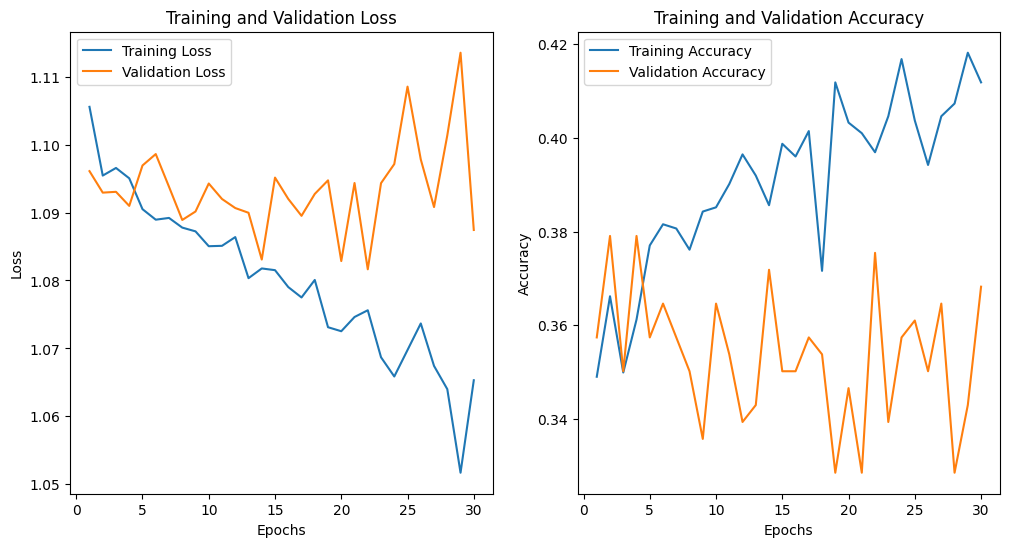

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

config = {
  'n_classes': 3,
  'input_size': 224*224,
  'output_size': 3,
  'hidden_layers': [512, 256, 128, 64],
  'batch_size': 32,
  'n_epochs': 30,
  'learning_rate': 0.001,
  'pretrained_weights_path': resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
  }


# Load the dataset
train_loader, val_loader, test_loader = load_dataset(batch_size = config['batch_size'], dataset=dataset)

# Create a model, send the model to the proper device
model = CLIPClassifier(output = config['output_size'],
                       num_classes = config['n_classes'],
                       hidden_size = config['hidden_layers'][0])
model.to(device)

# Load pre-trained weights (if available)


criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=config['learning_rate'])

# Finally train the model
train_loss, train_acc, val_loss, val_acc = train(model, criterion, optimizer, train_loader, val_loader, config['n_epochs'], device)
average_loss, accuracy, average_accuracy = test(model, criterion, test_loader, device)
#print(f"Test Loss: {average_loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Loss Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, config['n_epochs'] + 1), train_loss, label='Training Loss')
plt.plot(range(1, config['n_epochs'] + 1), val_loss, label='Validation Loss')
#plt.scatter(range(1, config['n_epochs'] + 1), train_loss, label='Training Loss Points', color='red', marker='o')
#plt.scatter(range(1, config['n_epochs'] + 1), val_loss, label='Validation Loss Points', color='blue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, config['n_epochs'] + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, config['n_epochs'] + 1), val_acc, label='Validation Accuracy')
#plt.scatter(range(1, config['n_epochs'] + 1), train_acc, label='Training Accuracy Points', color='red', marker='o')
#plt.scatter(range(1, config['n_epochs'] + 1), val_acc, label='Validation Accuracy Points', color='blue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# get the summary
# batch_size=1, channels=3, height=224, width=224
# summary(model,(1, config['input_size'])) # (batch_size, input_size)
